In [ ]:
# Timeseries of metaphor use reveal differing reactivities on cable news

## Supplemental Information (SI)

In [1]:
%matplotlib inline

import sys
sys.path.append('../')

# needed to access flask-mongoengine models
import os

# need to create one if you haven't already
os.environ['CONFIG_FILE'] = 'conf/default.cfg'

# will use this .gitignore'd directory to output figures
SAVE_DIR = 'Figures'
if not os.path.isdir(SAVE_DIR):
    os.mkdir(SAVE_DIR)

In [12]:
from viomet_9_10_17 import subject_object_analysis
from projects.common import get_project_data_frame

#### Publically-available .csv for reproducibility

I generate two files currently named `viomet-snapshot-project-df.csv` and `viomet-2012-snapshot-project-df.csv`, which are the September to Novermber dataframes for 2016 and 2012, respectively. These contain all rows that have been identified as metaphor. These were built using the following commands in Python:

```python
from projects.common import get_project_data_frame
df = get_project_data_frame('Viomet Sep-Nov 2016')
df.to_csv('/Users/mt/Desktop/viomet-snapshot-project-df.csv', 
          header=True, index=False, na_rep=None)
```

I then uploaded it to the Metacorps server using `scp`.

For completeness I will soon upload the full dataset in .csv form, which will include the potential instances that were either not metaphor or not about politics. This and the other .csv will be made available on a data publishing portal, and mirrored on the Metacorps server. 

In [28]:
metaphors_url = 'http://metacorps.io/static/viomet-snapshot-project-df.csv'
project_df = get_project_data_frame(metaphors_url)

print(project_df.columns)

Index(['start_localtime', 'start_time', 'stop_time', 'runtime_seconds',
       'network', 'program_name', 'iatv_id', 'facet_word',
       'conceptual_metaphor', 'spoken_by', 'subjects', 'objects',
       'active_passive', 'text', 'tense', 'repeat', 'repeat_index'],
      dtype='object')


## Fitting excited state models to each network and all networks

Given the project dataframe, the desired date range, and the corresponding `IatvCorpus` name (xxx need to add downloadable data to read from like project_df xxx), the excited state frequency change model can be calculated for every cable news source, and for the frequency of the sources taken as a whole.

By inspecting `fit_all_networks`, we can dig deeper into how the model fitting works. We'll return to this. For now, notice that `fit_networks` is a dictionary with three keys, one for each of the cable networks we are studying: `'MSNBCW'`, `'CNNW'`, and `'FOXNEWSW'`. The `W` stands for _west_, since the western version of these were the versions recorded in San Francisco. This information can be confirmed by examining the TVNA metadata blobs for each show.

The resulting data, printed to the console below, is presented in tables at the beginning of the Results section.

In [15]:
from viomet_9_10_17 import fit_all_networks
import pandas as pd

date_range = pd.date_range('2016-9-1', '2016-11-30', freq='D')
# uncomment below to run model fits; takes tens of seconds at least
fit_networks = fit_all_networks(project_df, date_range=date_range, iatv_corpus_name='Viomet Sep-Nov 2016')

In [16]:
print(fit_networks)

{'MSNBCW': (<projects.viomet.analysis.PartitionInfo object at 0x1102fa588>, AIC                                                     -17.6278
coef                   [2.2142857142857144, -1.3061224489795913]
first_date                                   2016-10-08 00:00:00
model          [[2.2142857142857144, -1.3061224489795913], [0...
second_date                                  2016-10-26 00:00:00
Name: 839, dtype: object), 'CNNW': (<projects.viomet.analysis.PartitionInfo object at 0x10b8e67f0>, AIC                                                      44.1597
coef                   [2.9230769230769225, -1.8687290969899664]
first_date                                   2016-09-23 00:00:00
model          [[2.9230769230769225, -1.8687290969899664], [-...
second_date                                  2016-10-15 00:00:00
Name: 138, dtype: object), 'FOXNEWSW': (<projects.viomet.analysis.PartitionInfo object at 0x1135304e0>, AIC                                                      42.5152
coef 

In [17]:
# set by_network=False to get the fit for all networks taken together
fit_sum = fit_all_networks(project_df, by_network=False, date_range=date_range, iatv_corpus_name='Viomet Sep-Nov 2016')

In [18]:
print(fit_sum)

AIC                                                      2.11842
coef                   [2.8583333333333307, -1.8027777777777756]
first_date                                   2016-09-25 00:00:00
model          [[2.8583333333333307, -1.8027777777777756], [-...
second_date                                  2016-10-25 00:00:00
Name: 240, dtype: object


## Visualize model fits overlaid on timeseries data

Once we find all the parameters of the models (partition dates and ground/excited state means or "levels") we can plot the model and the data together to compare.

In [18]:
from viomet_9_10_17 import by_network_frequency_figure

partition_infos = {network: fit_networks[network][0] for network in ['MSNBCW', 'CNNW', 'FOXNEWSW']}

by_network_frequency_figure(
    project_df, date_range=date_range, 
    iatv_corpus_name='Viomet Sep-Nov 2016', 
    partition_infos=partition_infos,
    save_path='Figures/model_fits.pdf'
)

from IPython.display import IFrame
IFrame("Figures/model_fits.pdf", width=600, height=450)

KeyError: 'the label [2016-11-18] is not in the [index]'

## Trump, Clinton as Subject and Object, and vice-versa

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


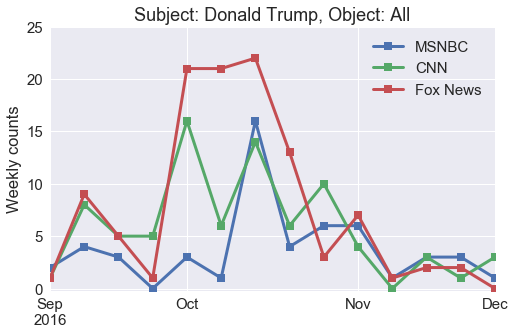

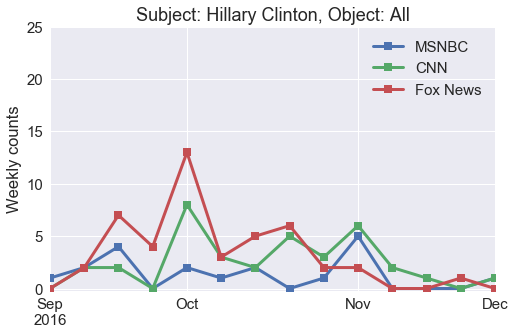

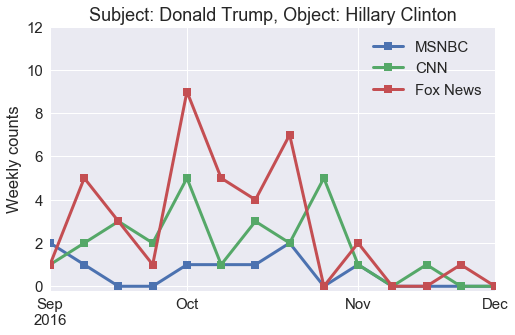

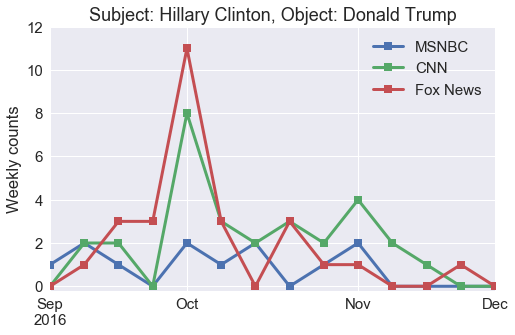

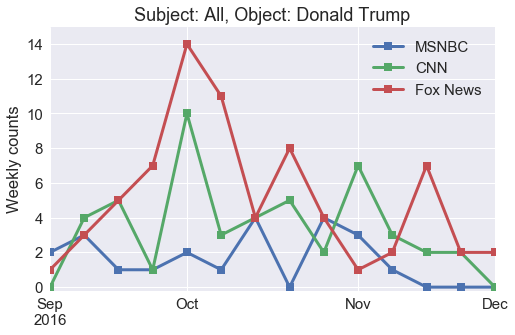

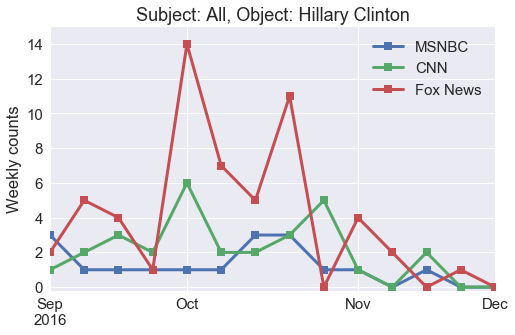

In [4]:
soa_dict = subject_object_analysis(
    project_df, plot=True, save_dir=SAVE_DIR, font_scale=1.5
)

In [5]:
# check that the figures were saved to disk
os.listdir(SAVE_DIR)

['All-Hillary-Clinton.pdf',
 'Donald-Trump-Hillary-Clinton.pdf',
 'Hillary-Clinton-Donald-Trump.pdf',
 'All-Donald-Trump.pdf',
 'Hillary-Clinton-All.pdf',
 'Donald-Trump-All.pdf']

## Violent phrase activating source domain

In this calculation, we need the partition dates from all models that we calculated above, stored in `partition_infos`. We calculate the daily average of the number of times a given violent word was used to activate the source domain. The average daily usage increases disproportionately with _attack_ as the violent word, at least on Fox News. On the other networks, there is a drop in usage of the next most common violent words used, _hit_, and _beat_. These appear as tables in the paper. We'll just print out the tables here in the notebook.

In [37]:
from viomet_9_10_17 import by_facet_word
excited, ground = by_facet_word(
    project_df, partition_infos, facet_words=['attack', 'beat', 'hit']
)


from IPython.display import display
print('Excited:')
display(excited)

print('\nGround:')
display(ground)

print('\nExcited - Ground:')
display(excited - ground)

Excited:


network,MSNBCW,CNNW,FOXNEWSW
facet_word,,,
attack,0.833333,1.766667,3.5
beat,0.766667,0.400000,0.7
hit,0.033333,0.266667,1.1



Ground:


network,MSNBCW,CNNW,FOXNEWSW
facet_word,,,
attack,0.590164,1.196721,0.901639
beat,0.524590,0.540984,0.393443
hit,0.147541,0.278689,0.377049



Excited - Ground:


network,MSNBCW,CNNW,FOXNEWSW
facet_word,,,
attack,0.243169,0.569945,2.598361
beat,0.242077,-0.140984,0.306557
hit,-0.114208,-0.012022,0.722951


## September to November 2012 and $Q$

Two to-dos are coming together below. One is to generate more intuitive and powerful observables. These
are outlined and calculated below. The other is to analyze the 2012 data. I'll do both at the same
time below, saving plots for the end.

### Observables:

We should avoid terse variables when possible for NHB. We want to calculate in one table: 

* Excited Start Date
* Excited End Date
* Ground Frequency
* Excited Frequency
* Change in Frequency 

In another table: 

* Sum total of ground
* Sum total of excited
* Excitability quotient = Sum of ground / sum of excited

$Q_\alpha$, where $\alpha$ indicates the source domain cross-section of interest. Specifically, we will calculate excitability quotients for cross sections of the specific violent word in the metaphorical construction, so $\alpha \in \{\text{attack}, \text{hit}, \text{beat}\}$, the three most-common words used for metaphorical violence. 

We will also look at sums of cross-sections of who is the subject of metaphorical violence, the one who does the metaphorical violence, and the object of the metaphorical violence, or the victim of the metaphorical violence. As for individuals who could be the subject or object of metaphorical violence, we consider the two Republican and Democratic presidential candidates Mitt Romney and Barack Obama in 2012 and Donald Trump and Hillary Clinton in 2016. We will consider each of them as the subject or object, paired with all other objects/subjects except their rival, and then we'll also consider each candidate as the subject/object with their rival the object/subject. Then for 2016 we would have $\alpha \in \{(\text{Trump}, \text{All}), (\text{Clinton}, \text{All}), (\text{Trump}, \text{Clinton}), (\text{Clinton}, \text{Trump}), (\text{All}, \text{Trump}), (\text{All}, \text{Clinton})\}$. We will calculate total ground state usage and the excitability quotient for each subject/object pair, for each cable news station.

In [10]:
IFrame('https://books.google.com/ngrams/graph?content=attack%2Chit%2Cbeat&year_start=2000&year_end=2016&corpus=17&smoothing=3&share=&direct_url=t1%3B%2Cattack%3B%2Cc0%3B.t1%3B%2Chit%3B%2Cc0%3B.t1%3B%2Cbeat%3B%2Cc0',
      width=650, height=400)

From Google Ngram Viewer, we get that the frequency of attack, hit, and beat are .0067, .0062, and .0034 for their American English corpus in 2008. We can use this to compare frequencies of metaphor with attack, hit, and beat. We could also use the total instances identified through search in our corpus. 

All this is well and good, now on to calculating these excitability quotients for 2012.

In [3]:
from project.common import get_project_data_frame

metaphors_url = 'http://metacorps.io/static/data/viomet-2012-snapshot-project-df.csv'
project_df = get_project_data_frame(metaphors_url)

print(project_df.columns)

ModuleNotFoundError: No module named 'project'

In [20]:
from viomet_9_10_17 import fit_all_networks
import pandas as pd


IATV_CORPUS_NAME = 'Viomet Sep-Nov 2012'

date_range = pd.date_range('2012-9-1', '2012-11-30', freq='D')
# uncomment below to run model fits; takes tens of seconds at least
fit_networks = fit_all_networks(project_df, date_range=date_range, 
                                iatv_corpus_name=IATV_CORPUS_NAME)

In [23]:
from viomet_9_10_17 import by_network_frequency_figure

partition_infos = {network: fit_networks[network][0] 
                   for network in ['MSNBCW', 'CNNW', 'FOXNEWSW']}

by_network_frequency_figure(
    project_df, date_range=date_range, 
    iatv_corpus_name=IATV_CORPUS_NAME, 
    partition_infos=partition_infos,
    save_path='Figures/model_fits_2012.pdf'
)

from IPython.display import IFrame
IFrame("Figures/model_fits_2012.pdf", width=600, height=450)

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


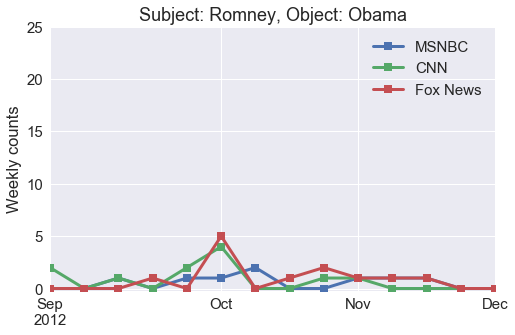

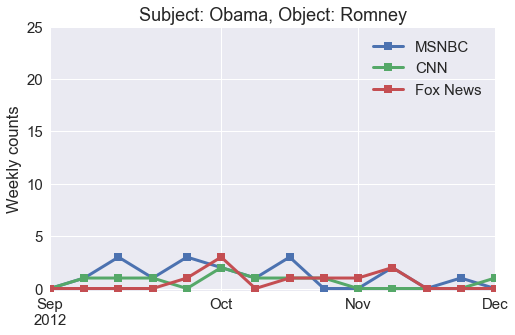

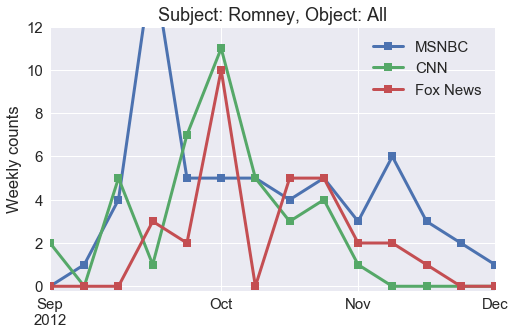

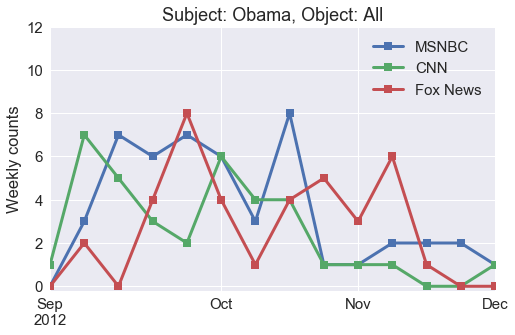

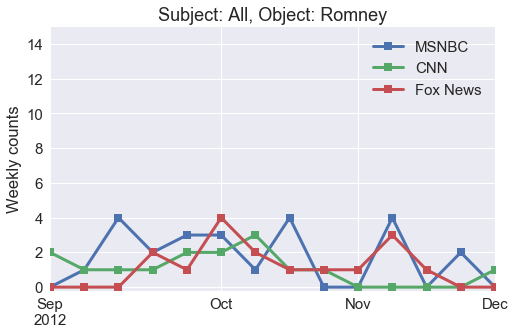

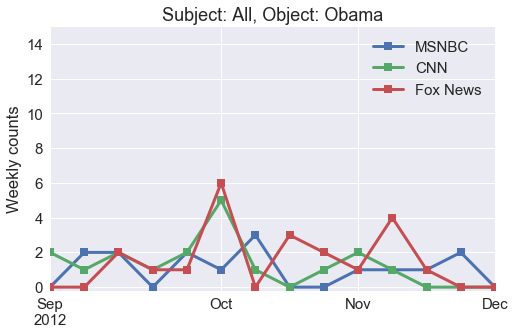

In [28]:
soa_dict = subject_object_analysis(
    project_df, subj_obj=[
        ('Romney', 'Obama'),
        ('Obama', 'Romney'),
        ('Romney', None),
        ('Obama', None),
        (None, 'Romney'),
        (None, 'Obama')
    ],    
    date_range=date_range,
    plot=True, save_dir=SAVE_DIR, font_scale=1.5
)

In [29]:
from viomet_9_10_17 import by_facet_word
excited, ground = by_facet_word(
    project_df, partition_infos, facet_words=['attack', 'beat', 'hit']
)


from IPython.display import display
print('Excited:')
display(excited)

print('\nGround:')
display(ground)

print('\nExcited - Ground:')
display(excited - ground)

Excited:


network,MSNBCW,CNNW,FOXNEWSW
facet_word,,,
attack,1.097561,1.170732,0.634146
beat,0.731707,0.365854,0.658537
hit,0.804878,0.463415,0.585366



Ground:


network,MSNBCW,CNNW,FOXNEWSW
facet_word,,,
attack,0.66,0.54,0.38
beat,0.84,0.46,0.40
hit,0.78,0.42,0.42



Excited - Ground:


network,MSNBCW,CNNW,FOXNEWSW
facet_word,,,
attack,0.437561,0.630732,0.254146
beat,-0.108293,-0.094146,0.258537
hit,0.024878,0.043415,0.165366


OK, looks like everything is working well. Time to review the annotated metaphor.